Tugas 1 membuat modifikasi dengan menambahkan data lain berupa kolom pekerjaan, hobi dan gender.

In [8]:
# Praktik PySpark
from pyspark.sql import SparkSession

# Memulai Spark Session
spark = SparkSession.builder.appName("PrakBigData").getOrCreate()

# Membuat DataFrame Sederhana
data = [("Ridwan", 17, "DPR","Mancing","Pria"), 
        ("Rio", 18, "Mahasiswa", "Ngoding","Pria"),
        ("Restu", 21, "Dokter", "Memasak", "Wanita"), 
        ("Faizal", 22, "Presiden", "Membaca", "Pria")]
columns = ["Nama", "Usia","Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

#Menampilkan DataFrame
df.show()

+------+----+---------+-------+------+
|  Nama|Usia|Pekerjaan|   Hobi|Gender|
+------+----+---------+-------+------+
|Ridwan|  17|      DPR|Mancing|  Pria|
|   Rio|  18|Mahasiswa|Ngoding|  Pria|
| Restu|  21|   Dokter|Memasak|Wanita|
|Faizal|  22| Presiden|Membaca|  Pria|
+------+----+---------+-------+------+



Tugas 2 melakukan filter, penghitungan rata-rata, dan pengurutan data menggunakan PySpark.

In [9]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg

# Memulai Spark session
spark = SparkSession.builder.appName("PrakBigData").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ridwan", 17), ("Rio", 18), ("Restu", 21), ("Faizal", 22)]
columns = ["Nama", "Usia"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

# Filtering data (usia lebih dari 20)
df_filtered = df.filter(df['Usia'] > 20)
df_filtered.show()

# Menghitung rata-rata usia
df.groupBy().agg(avg("Usia")).show()

# Mengurutkan data berdasarkan usia (descending)
df_sorted = df.orderBy("Usia", ascending=False)
df_sorted.show()


+------+----+
|  Nama|Usia|
+------+----+
|Ridwan|  17|
|   Rio|  18|
| Restu|  21|
|Faizal|  22|
+------+----+

+------+----+
|  Nama|Usia|
+------+----+
| Restu|  21|
|Faizal|  22|
+------+----+



+---------+
|avg(Usia)|
+---------+
|     19.5|
+---------+

+------+----+
|  Nama|Usia|
+------+----+
|Faizal|  22|
| Restu|  21|
|   Rio|  18|
|Ridwan|  17|
+------+----+



Tugas 3 Modifikasi DataFrame Pandas dengan menambahkan kolom baru dan melakukan operasi seperti filtering data berdasarkan usia.

In [10]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ridwan", "Rio", "Restu", "Faizal"], "Usia": [17, 18, 21, 22]}
df_pandas = pd.DataFrame(data_pandas)

# Menampilkan DataFrame awal
print("DataFrame Awal:")
print(df_pandas)

# Menambahkan kolom baru, misalnya "Status Usia"
# Menambahkan kategori berdasarkan usia (misalnya, >20 dewasa, <=20 muda)
df_pandas['Status Usia'] = df_pandas['Usia'].apply(lambda x: 'Dewasa' if x > 20 else 'Muda')

# Menampilkan DataFrame setelah penambahan kolom baru
print("\nDataFrame Setelah Penambahan Kolom 'Status Usia':")
print(df_pandas)

# Melakukan filtering berdasarkan usia (>20)
df_filtered = df_pandas[df_pandas['Usia'] > 20]

# Menampilkan hasil filtering
print("\nDataFrame Setelah Filtering (Usia > 20):")
print(df_filtered)


DataFrame Awal:
     Nama  Usia
0  Ridwan    17
1     Rio    18
2   Restu    21
3  Faizal    22

DataFrame Setelah Penambahan Kolom 'Status Usia':
     Nama  Usia Status Usia
0  Ridwan    17        Muda
1     Rio    18        Muda
2   Restu    21      Dewasa
3  Faizal    22      Dewasa

DataFrame Setelah Filtering (Usia > 20):
     Nama  Usia Status Usia
2   Restu    21      Dewasa
3  Faizal    22      Dewasa


Tugas 4 Melakukan penggabungan dataframe dan memvisualisasikan menggunakan data pandas

DataFrame Gabungan:
     Nama  Usia   Pekerjaan
0  Ridwan    17    Mahasewa
1     Rio    18  Programmer
2   Restu    21      Dokter
3  Faizal    22     Perawat

Statistik Deskriptif untuk DataFrame Pertama:
            Usia
count   4.000000
mean   19.500000
std     2.380476
min    17.000000
25%    17.750000
50%    19.500000
75%    21.250000
max    22.000000


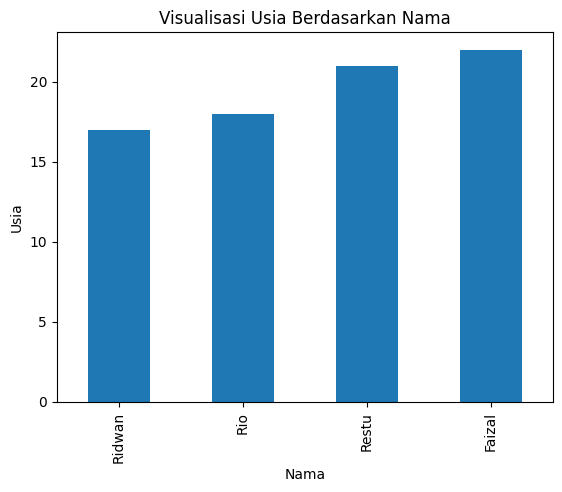

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Membuat DataFrame Pandas pertama
data_pandas = {"Nama": ["Ridwan", "Rio", "Restu", "Faizal"], "Usia": [17, 18, 21, 22]}
df_pandas = pd.DataFrame(data_pandas)

# Membuat DataFrame Pandas kedua
data_pandas_2 = {"Nama": ["Ridwan", "Rio", "Restu", "Faizal"], "Pekerjaan": ["Mahasewa", "Programmer", "Dokter", "Perawat"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# Menggabungkan dua DataFrame berdasarkan kolom 'Nama'
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print("DataFrame Gabungan:")
print(df_joined)

# Menghitung statistik deskriptif untuk DataFrame pertama
print("\nStatistik Deskriptif untuk DataFrame Pertama:")
print(df_pandas.describe())

# Visualisasi Data Usia dengan grafik batang
df_pandas.plot(kind='bar', x='Nama', y='Usia', legend=False)
plt.title('Visualisasi Usia Berdasarkan Nama')
plt.ylabel('Usia')
plt.xlabel('Nama')
plt.show()


Tugas 5: Gunakan metode ini untuk menggabungkan data yang Anda buat di PySpark dengan data dari Pandas, kemudian lakukan analisis sederhana seperti menghitung rata-rata usia

In [13]:
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.functions import avg

# Memulai Spark session
spark = SparkSession.builder.appName("PrakBigData").getOrCreate()

# Membuat DataFrame PySpark
data_spark = [("Ridwan", 17), ("Rio", 18), ("Restu", 21), ("Faizal", 22)]
columns = ["Nama", "Usia"]
df_spark = spark.createDataFrame(data_spark, columns)

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Fadzil", "Zuhdan", "Zidhan"], "Usia": [25, 24, 19]}
df_pandas = pd.DataFrame(data_pandas)

# Mengonversi DataFrame PySpark ke Pandas
df_pandas_from_spark = df_spark.toPandas()

# Mengonversi DataFrame Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Gabungkan DataFrame PySpark yang sudah dikonversi dari Pandas dengan DataFrame PySpark asli
df_combined_spark = df_spark.union(df_spark_from_pandas)

# Menampilkan DataFrame hasil penggabungan
df_combined_spark.show()

# Analisis sederhana: menghitung rata-rata usia setelah penggabungan data
df_combined_spark.groupBy().agg(avg("Usia")).show()


+------+----+
|  Nama|Usia|
+------+----+
|Ridwan|  17|
|   Rio|  18|
| Restu|  21|
|Faizal|  22|
|Fadzil|  25|
|Zuhdan|  24|
|Zidhan|  19|
+------+----+

+------------------+
|         avg(Usia)|
+------------------+
|20.857142857142858|
+------------------+



Tugas 6  Gabungkan data dari PySpark dan Pandas, lalu lakukan operasi statistik seperti menghitung nilai maksimum usia.

In [14]:
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.functions import max

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame PySpark
data_spark = [("Ali", 34), ("Budi", 23), ("Citra", 29), ("Dina", 45)]
columns = ["Nama", "Usia"]
df_spark = spark.createDataFrame(data_spark, columns)

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Eka", "Farid", "Gita"], "Usia": [27, 32, 36]}
df_pandas = pd.DataFrame(data_pandas)

# Mengonversi DataFrame PySpark ke Pandas
df_pandas_from_spark = df_spark.toPandas()

# Mengonversi DataFrame Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Gabungkan DataFrame PySpark yang sudah dikonversi dari Pandas dengan DataFrame PySpark asli
df_combined_spark = df_spark.union(df_spark_from_pandas)

# Menampilkan DataFrame hasil penggabungan
df_combined_spark.show()

# Operasi statistik: menghitung nilai maksimum usia
df_combined_spark.groupBy().agg(max("Usia")).show()


24/08/26 03:22:41 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
|  Eka|  27|
|Farid|  32|
| Gita|  36|
+-----+----+

+---------+
|max(Usia)|
+---------+
|       45|
+---------+

